In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from dolfin import *
from math import sin, cos

In [61]:
mesh = Mesh("ball.xml")
#PolygonalMeshGenerator.generate(mesh, "ball.off", 0.05)

In [67]:
n_steps = 10
dt = 10./n_steps

#mesh = RectangleMesh(Point(-1, -1), Point(1, 1), 100, 100)
V = FunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

u0 = Constant(0)
f = Constant(0)
a = u*v*dx + dt*inner(grad(u), grad(v))*dx 
L = u0*v*dx + dt*f*v*dx
bc = DirichletBC(V, Constant(0), DomainBoundary())
A, b = assemble_system(a, L, bc)

vtkfile = File('sphere_diffusion.pvd')
u = Function(V)
t = 0
for step in range(n_steps):
    t += dt

    for i in range(10): 
        x = np.random.uniform(-1,1)
        y = np.random.uniform(-1,1)
        z = np.random.uniform(-1,1)
        length = np.sqrt(x*x + y*y + z*z)
        x /= length
        y /= length        
        z /= length
        x *= 0.99
        y *= 0.99
        z *= 0.99
        delta = PointSource(V, Point(x, y, z), 1)
        delta.apply(b)
    solve(A, u.vector(), b)

    #plot(u, interactive=True)
    vtkfile << (u, t)
    
    # reset rhs
    b.zero()
    bc.apply(b) 

In [56]:
x = np.linspace(-1,1,100)*0.1
y = np.linspace(-1,1,100)*0.1
z = np.linspace(-1,1,100)*0.1
uu = []
for xx in x:
    for yy in y:
        for zz in z:
            uu.append(u(xx,yy,zz))
uu = np.array(uu).reshape((100,100,100))

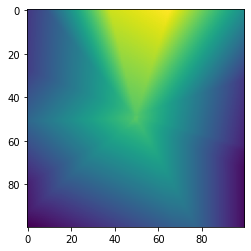

In [57]:
plt.imshow(uu[50,:,:])

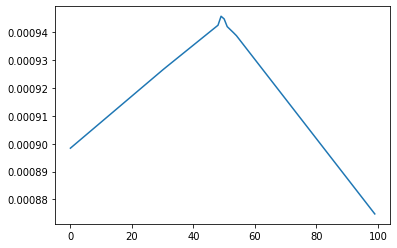

In [58]:
plt.plot(uu[50,50,:])

In [43]:
c = mesh.coordinates()
d = mesh.data()
cells = mesh.

AttributeError: 'dolfin.cpp.mesh.Mesh' object has no attribute 'faces'

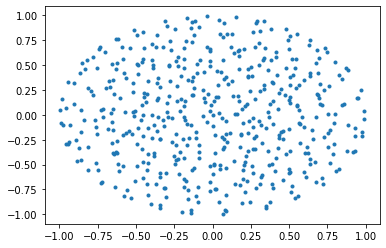

In [40]:
plt.plot(c[:,0], c[:,1], '.')

In [42]:
cells

array([[ 84, 102, 147, 328],
       [ 84, 216, 258, 399],
       [ 89, 171, 242, 435],
       ...,
       [197, 311, 355, 496],
       [ 90, 311, 355, 496],
       [127, 243, 363, 376]], dtype=uint32)

In [76]:
V_vec = VectorFunctionSpace(mesh, "CG", 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [82]:
h = project(grad(u),V_vec)

In [86]:
h(0,0,0.99)

array([-3.73546869e-05, -1.07552976e-04, -9.29247393e-03])